| Column           | Description |
| :--------------- | :------------------------------------------------------------ |
| compititorname   | Name of Manufacturer  |
| chocolate	       | Does it contain chocolate? |
| fruity           | Is it fruit flavored? |
| caramel          | Is there caramel in the candy? |
| peanutalmondy    |	Does it contain peanuts, peanut butter or almonds? |
| nougat           |	Does it contain nougat? |
| crispedricewafer |	Does it contain crisped rice, wafers, or a cookie component? |
| hard             |	Is it a hard candy? |
| bar              |	Is it a candy bar? |
| pluribus         |	Is it one of many candies in a bag or box? |
| sugarpercent     |	The percentile of sugar it falls under within the data set. |
| pricepercent     |	The unit price percentile compared to the rest of the set. |
| winpercent       | The overall win percentage according to 269,000 matchups. |

In [1]:
import numpy as np                     
import pandas as pd

pd.set_option('mode.chained_assignment', None)     
pd.set_option('display.max_colwidth', -1)          
pd.options.display.max_columns = 50                

import warnings
warnings.filterwarnings('ignore')                  

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True) 

C:\Users\Uthayanan\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


In [2]:
candy_df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/candy-data.csv')
candy_df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [3]:
candy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [4]:
candy_df.describe(include='all')

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
unique,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,WelchÕs Fruit Snacks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,NaN,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998


In [5]:
candy_df.drop(['competitorname'],axis=1,inplace=True)
candy_df.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [19]:
'''
Q1 =candy_df.quantile(0.05)        
Q3 = candy_df.quantile(0.95)      
IQR = Q3 - Q1                      
print('IQR is:\n',IQR)
candy_out = candy_df[~((candy_df<Q1)|(candy_df>Q3)).any(axis=1)]
print(candy_out)        
print (candy_out)

'''

"\nQ1 =candy_df.quantile(0.05)        \nQ3 = candy_df.quantile(0.95)      \nIQR = Q3 - Q1                      \nprint('IQR is:\n',IQR)\ncandy_out = candy_df[~((candy_df<Q1)|(candy_df>Q3)).any(axis=1)]\nprint(candy_out)        \nprint (candy_out)\n\n"

In [8]:
candy_df[candy_df.columns[1:-3]].agg(['sum','count'])

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
sum,38,14,14,7,7,15,21,44
count,85,85,85,85,85,85,85,85


In [9]:
candy_df.sort_values('winpercent', ascending=False)[:10]

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
51,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
79,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
28,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
64,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
53,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990
36,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556
54,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
32,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050
42,1,0,0,1,0,0,0,1,0,0.604,0.767,70.735641


In [10]:
candy_df.sort_values('winpercent')[:10]

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
44,0,1,0,0,0,0,0,0,1,0.197,0.976,22.445341
7,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
12,0,1,0,0,0,0,0,0,1,0.046,0.325,24.524988
72,0,1,0,0,0,0,0,0,0,0.162,0.116,27.303865
26,0,1,0,0,0,0,1,0,1,0.093,0.511,28.127439
57,0,0,0,0,0,0,1,0,1,0.732,0.069,29.703691
71,0,0,1,0,0,0,0,0,0,0.418,0.325,32.230995
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
70,0,0,1,0,0,0,0,0,1,0.965,0.767,33.437550
19,0,0,0,0,0,0,0,0,1,0.465,0.465,34.158958


0    48
1    37
Name: chocolate, dtype: int64
0    47
1    38
Name: fruity, dtype: int64
0    71
1    14
Name: caramel, dtype: int64
0    71
1    14
Name: peanutyalmondy, dtype: int64
0    78
1    7 
Name: nougat, dtype: int64
0    78
1    7 
Name: crispedricewafer, dtype: int64
0    70
1    15
Name: hard, dtype: int64
0    64
1    21
Name: bar, dtype: int64
1    44
0    41
Name: pluribus, dtype: int64


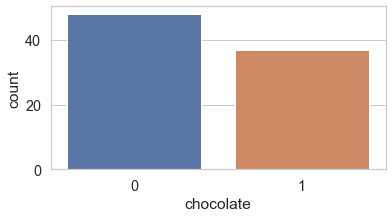

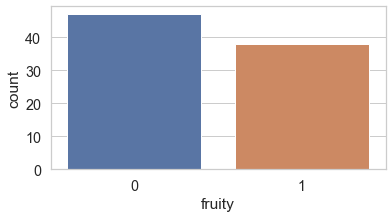

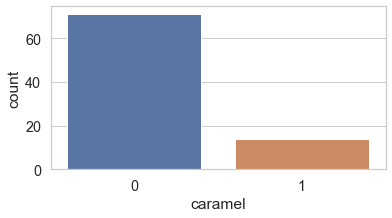

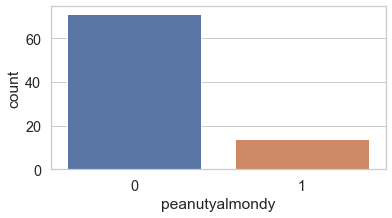

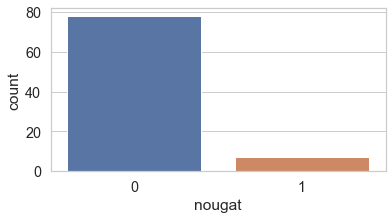

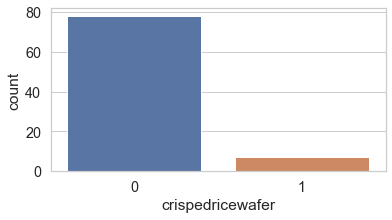

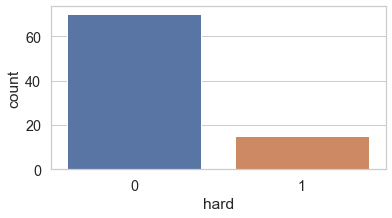

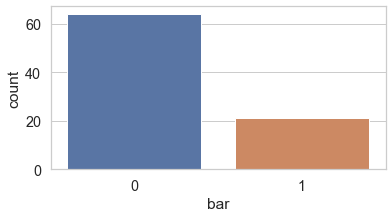

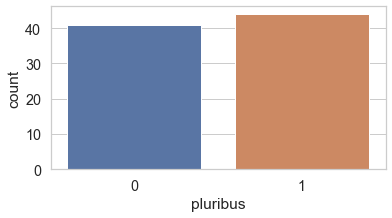

In [19]:
feature_cols = ['chocolate','fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard','bar','pluribus']

for f in feature_cols:
    print(candy_df[f].value_counts())
    sns.set_style('whitegrid')
    plt.figure(figsize=(6,3))
    sns.countplot(x=f,data=candy_df)

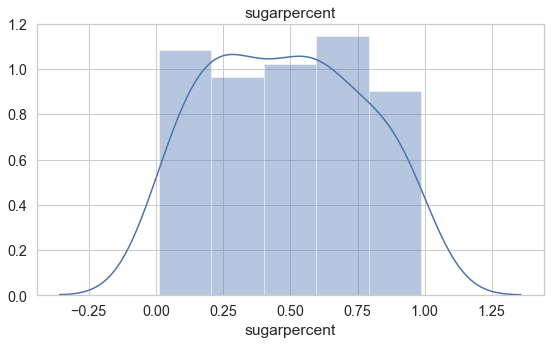

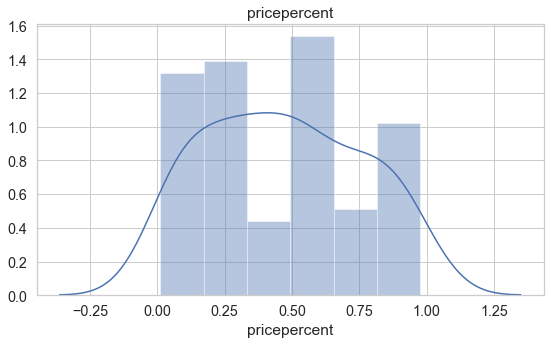

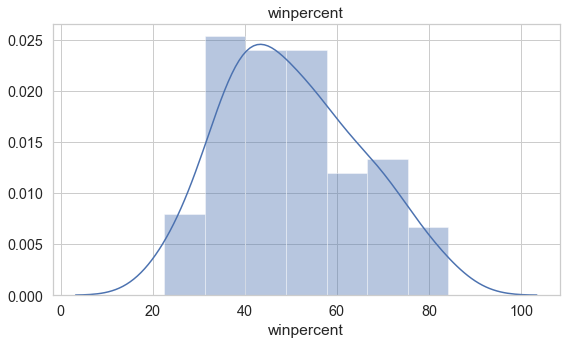

In [27]:
cont_cols= ['sugarpercent','pricepercent', 'winpercent']

for column in cont_cols:
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    sns.distplot(candy_df[column])
    plt.title(column)

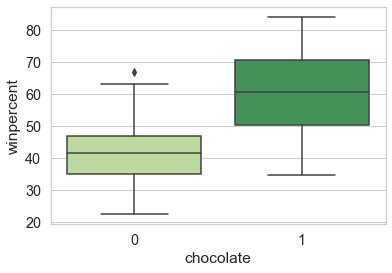

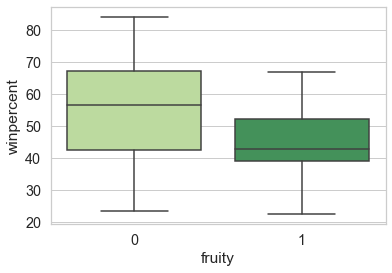

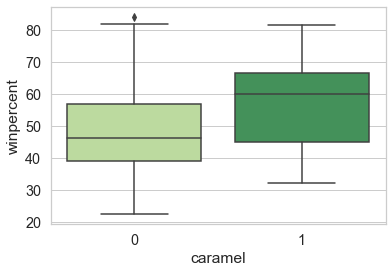

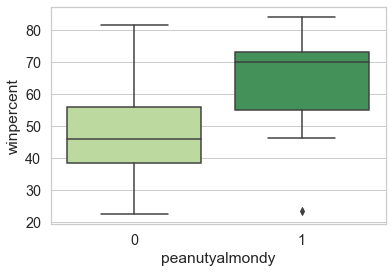

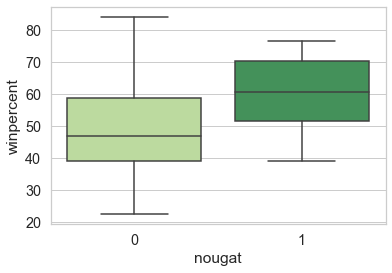

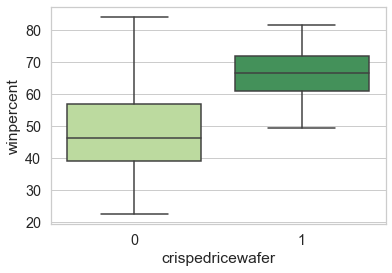

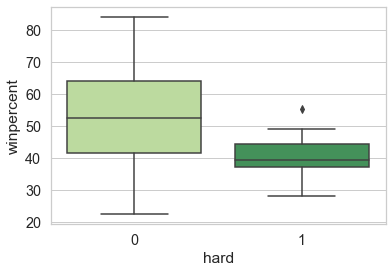

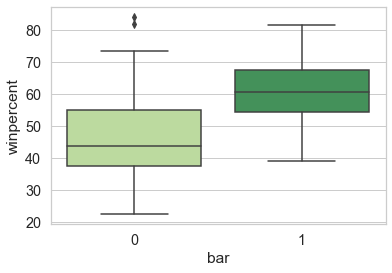

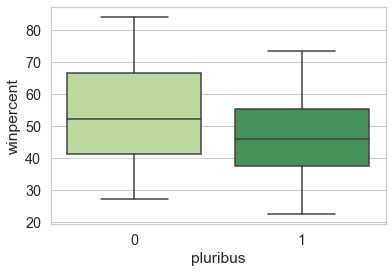

In [20]:
for column in feature_cols:
    fig = plt.figure()
    sns.boxplot(data=candy_df, x=column, y="winpercent", palette="YlGn")

- Chocolate,bar,caramel,peanutyalmondy,nougat and crispedricewafer are having high correlation with respect to winpercent

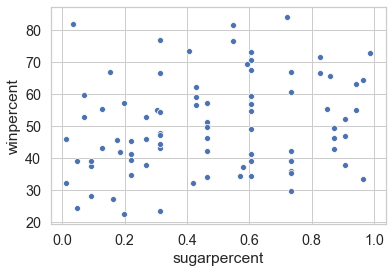

In [17]:
fig = plt.figure()
sns.scatterplot(data=candy_df, x="sugarpercent", y="winpercent")

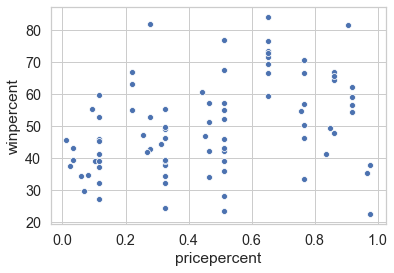

In [18]:
fig = plt.figure()
sns.scatterplot(data=candy_df, x="pricepercent", y="winpercent")

- pricepercent and sugarpercent are having low correlation with winpercent

### Corelation of Features

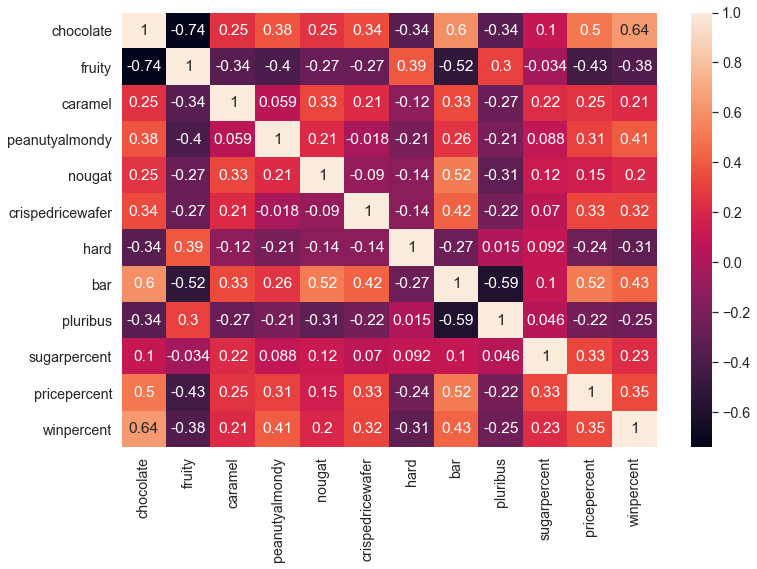

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(candy_df.corr(),annot=True)

In [29]:
X = candy_df.loc[:,candy_df.columns!='winpercent']
y = candy_df.winpercent

In [30]:
print(X.shape)
print(y.shape)

(85, 11)
(85,)


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [34]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(17, 11)
(68, 11)
(17,)
(68,)


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [36]:
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [38]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X_train_s,y_train)

LinearRegression()

In [39]:
y_train_pred = model1.predict(X_train_s)

y_test_pred = model1.predict(X_test_s)

In [40]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

,Actual,Predicted
38,64.353340,55.109082
44,22.445341,40.869181
27,57.219250,52.102607
40,54.526451,59.647788
36,73.099556,59.076602
80,45.466282,44.613032
58,42.849144,42.794438
69,34.578991,39.500392
84,49.524113,75.559003
56,65.716286,55.827627


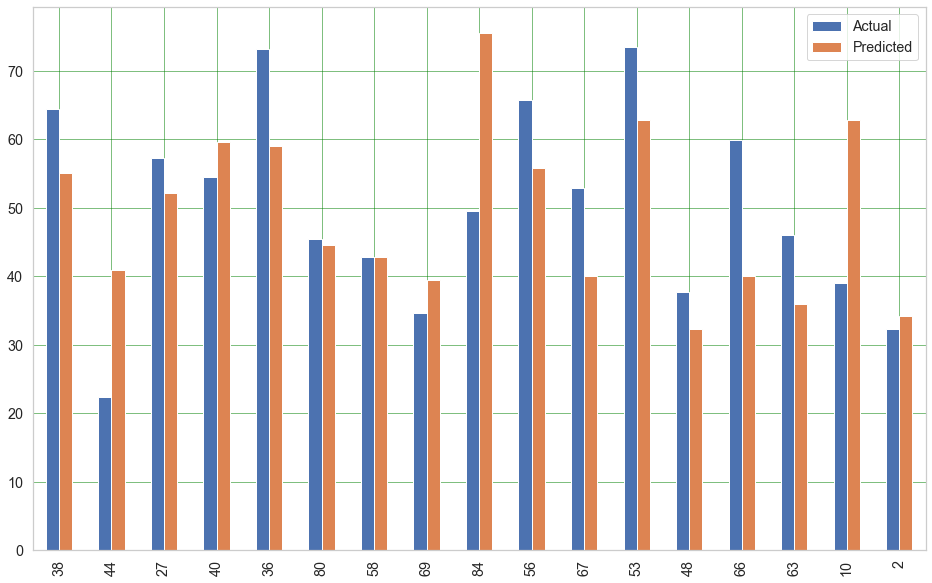

In [41]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [43]:
print('Intercept:',model1.intercept_)
print('Coefficients:',model1.coef_)  

Intercept: 50.38333748529411
Coefficients: [ 9.36003707  4.00992872 -1.32070992  3.22208481  2.07080638  4.53770851
 -2.41342001 -2.05089436 -1.4079862   3.09017666 -0.20615426]


In [44]:
from sklearn import metrics

RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))

print('Test RMSE: ',RMSE_test)
print('Train RMSE: ',RMSE_train)

Test RMSE:  12.924852701384255
Train RMSE:  9.49795997279783


In [45]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_test_pred)
r2

0.1611961264082319

In [26]:
from pycaret.regression import *

In [30]:
model_pycaret = setup(data=candy_df,target='winpercent',session_id=488)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,488
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(85, 12)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,9
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [32]:
compare_models(whitelist=['lr','dt','rf'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Random Forest,10.0842,158.0305,12.3601,0.0267,0.2620,0.2346,0.3597
1,Linear Regression,10.5340,184.5477,13.0038,-0.1419,0.2601,0.2341,0.0080
2,Decision Tree,12.7369,256.1694,14.9388,-0.4895,0.3062,0.2849,0.0041


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=488, verbose=0, warm_start=False)